In [1]:
#Stephen Chikumbu R195933F
#Reuben Dembo R195894B
#Emmanuel Chinundu R195781K

from google.colab import files

uploaded = files.upload()

Saving projectDataset.csv to projectDataset.csv


In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('projectDataset.csv')


In [2]:
data_df =pd.DataFrame(data)
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data_df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [4]:
clean_data ={
    'NObeyesdad':{
        'Obesity_Type_I':1 ,
         'Obesity_Type_III':2,
         'Obesity_Type_II':3,
         'Overweight_Level_I':4,
         'Overweight_Level_II':5,
         'Normal_Weight':6,
         'Insufficient_Weight':7
    }
}

In [5]:
data_df = data_df.replace(clean_data)
data_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,6
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,6
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,4
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,5


In [6]:
#data_df['NObeyesdad'] = pd.to_numeric(data_df['NObeyesdad'])

In [7]:
data_df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                          int64
dtype: object

In [8]:
data_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,3.849360
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,2.017706
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,2.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,4.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,6.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,7.000000


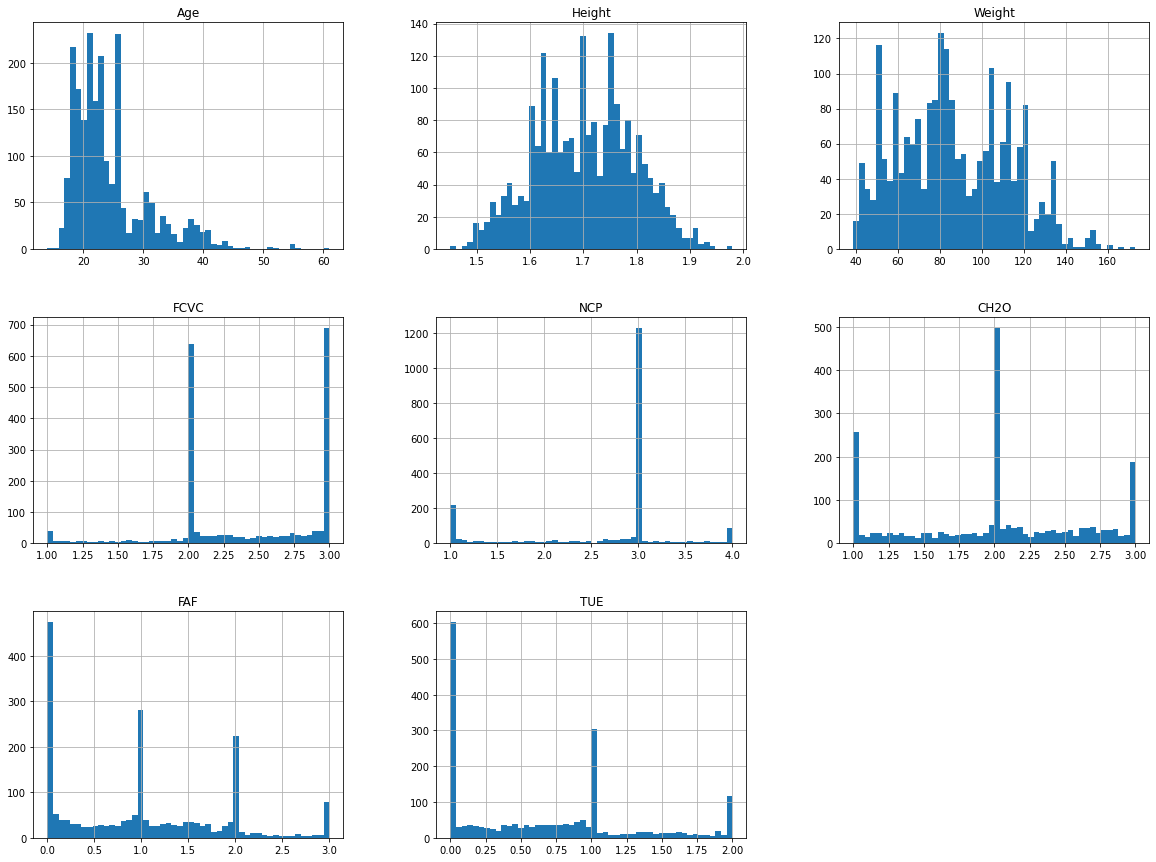

In [9]:
import matplotlib.pyplot as plt
data.hist(bins=50 , figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data,test_size = 0.2 , random_state =42)
print(len(train_set),'train + ',len(test_set),'test')

1688 train +  423 test


In [11]:
data_df['Gender'],_ =pd.factorize(data_df['Gender'])
data_df['family_history_with_overweight'],_ =pd.factorize(data_df['family_history_with_overweight'])
data_df['FAVC'],_ =pd.factorize(data_df['FAVC'])
data_df['CAEC'],_ =pd.factorize(data_df['CAEC'])
data_df['SMOKE'],_ =pd.factorize(data_df['SMOKE'])
data_df['CALC'],_ =pd.factorize(data_df['CALC'])
data_df['MTRANS'],_ =pd.factorize(data_df['MTRANS'])
data_df['SCC'],_ =pd.factorize(data_df['SCC'])

In [12]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [13]:
corr_matrix = data_df.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,-0.102512,0.064934,-0.274505,0.067600,-0.006900,0.044698,0.107930,-0.102633,0.189607,0.017269,-0.007616,0.164116,0.025778
Age,0.048394,1.000000,-0.025958,0.202560,-0.205725,0.063902,0.016291,-0.043944,-0.125836,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.567983,-0.247464
Height,0.618466,-0.025958,1.000000,0.463136,-0.247684,0.178364,-0.038121,0.243672,-0.133042,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.085768,-0.064963
Weight,0.161668,0.202560,0.463136,1.000000,-0.496820,0.272300,0.216125,0.107469,-0.325981,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.046615,-0.741384
family_history_with_overweight,-0.102512,-0.205725,-0.247684,-0.496820,1.000000,-0.208036,-0.040372,-0.071370,0.319276,-0.017385,-0.147437,0.185422,0.056673,-0.022943,0.036676,-0.065036,0.459742
FAVC,0.064934,0.063902,0.178364,0.272300,-0.208036,1.000000,-0.027283,-0.007000,-0.144333,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.009102,-0.278537
FCVC,-0.274505,0.016291,-0.038121,0.216125,-0.040372,-0.027283,1.000000,0.042216,-0.062290,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,-0.065098,-0.073456
NCP,0.067600,-0.043944,0.243672,0.107469,-0.071370,-0.007000,0.042216,1.000000,-0.071833,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.059022,0.062796
CAEC,-0.006900,-0.125836,-0.133042,-0.325981,0.319276,-0.144333,-0.062290,-0.071833,1.000000,0.040859,0.048486,0.152793,0.047329,-0.073929,0.015833,-0.062877,0.304570
SMOKE,0.044698,0.091987,0.055499,0.025746,-0.017385,-0.050660,0.014320,0.007811,0.040859,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,0.021045,0.009252


In [14]:
corr_matrix['NObeyesdad'].sort_values(ascending=False)

NObeyesdad                        1.000000
family_history_with_overweight    0.459742
CAEC                              0.304570
FAF                               0.159263
SCC                               0.154936
TUE                               0.087560
NCP                               0.062796
Gender                            0.025778
MTRANS                            0.017934
SMOKE                             0.009252
Height                           -0.064963
FCVC                             -0.073456
CALC                             -0.087673
CH2O                             -0.152567
Age                              -0.247464
FAVC                             -0.278537
Weight                           -0.741384
Name: NObeyesdad, dtype: float64

In [15]:
data_new=data_df.drop(['CH2O','CALC','FCVC','Height','SMOKE','MTRANS','Gender','NCP','TUE','SCC','FAF'],axis=1)
data_new.head()

,Age,Weight,family_history_with_overweight,FAVC,CAEC,NObeyesdad
0,21.0,64.0,0,0,0,6
1,21.0,56.0,0,0,0,6
2,23.0,77.0,0,0,0,6
3,27.0,87.0,1,0,0,4
4,22.0,89.8,1,0,0,5


In [16]:
X=data_new.drop('NObeyesdad',axis=1)
Y=data_new['NObeyesdad']


In [17]:
X.head()

,Age,Weight,family_history_with_overweight,FAVC,CAEC
0,21.0,64.0,0,0,0
1,21.0,56.0,0,0,0
2,23.0,77.0,0,0,0
3,27.0,87.0,1,0,0
4,22.0,89.8,1,0,0


In [18]:
Y.head()

0    6
1    6
2    6
3    4
4    5
Name: NObeyesdad, dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [20]:
#scale=MinMaxScaler()
#X=scale.fit_transform(X)


In [21]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=42)


In [22]:
Xtrain.shape

(1688, 5)

In [23]:
Xtest.shape

(423, 5)

In [24]:
Ytrain.shape

(1688,)

In [25]:
Ytest.shape

(423,)

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtest,Ytest)

DecisionTreeRegressor()

In [27]:
y_pred = tree_reg.predict(Xtest)

In [28]:
from sklearn.metrics import r2_score
score = r2_score(Ytest,y_pred)


In [29]:
score

0.9988891019058599

In [30]:
import pickle
Pkl_Filename = "obessity_classifier.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(tree_reg, file)

In [31]:
Y.unique()

array([6, 4, 5, 1, 7, 3, 2], dtype=int64)

In [32]:
X.columns.tolist()

['Age', 'Weight', 'family_history_with_overweight', 'FAVC', 'CAEC']

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Weight                          2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   CAEC                            2111 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 82.6 KB


In [34]:
X.family_history_with_overweight.unique()

array([0, 1], dtype=int64)